# Mathematical representation of the central dogma of molecular biology using ODEs

The central dogma of molecular biology is a theory of the flow of information in biological systems that states that genetic expression flows from DNA to mRNA, in a process called transcription, and then, from mRNA to protein, in a process called translation, being this one the terminal output.
In some uncommon circumstances, the direction of the flow can change, like in some viruses. RNA viruses can encode their genomes in RNA, which can be reverse-transcribed to DNA in a host cell.
The central dogma is depicted in the figure below:

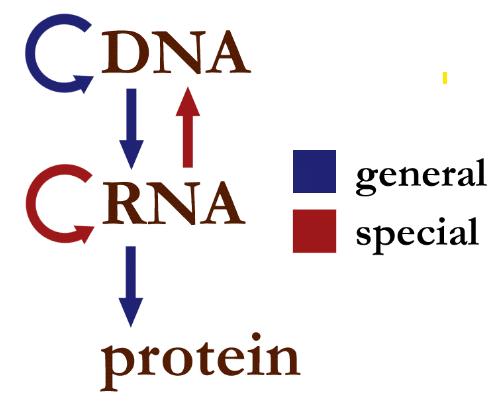

This flow of information can be modeled from a mathematical point of view as a process of production and degradation at specific rates of each of the elements over time . This simple flow can be represented mathematically as a system of ordinary differential equations (ODE) as follows:

  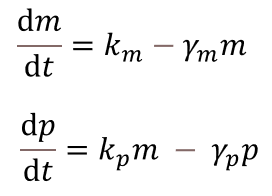

Being
* 𝑚 = mRNA
* 𝑝 = protein
* 𝑘𝑚 = production rate of mRNA
* 𝛾𝑚 = degradation rate of mRNA
* 𝑘𝑝 = production rate of protein
* 𝛾𝑝 = degradation rate of protein
  
𝑘𝑚 is a independent rate because it can happen regardless the current abundance of mRNA , however, 𝛾𝑚 is dependent of the abundance of mRNA, because just a fraction of mRNA will be degraded. kp is being multiple by the current abundance of mRNA, because mRNA is needed to produce proteins.

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

### Solving the system of ODEs

In [ ]:
y0 = [0,0] # the first vector is the mRNA, and second vector is protein.  Initial conditions 
t = np.linspace(0,200, num=100)  # time steps 

#Parameters
""" These are the set of parameters dominating the output of the ODE system """
k_m =0.3  # mRNA production rate 
gamma_m = 0.09   # mRNA degradation rate 
k_p = 0.5  # protein production rate 
gamma_p = 0.15  # protein degradation rate 

parameters = [k_m ,gamma_m ,k_p,gamma_p]  # setting the parameters in a single array 

# Defining master function 
def simulation (variables,t, parameters):
    # Variables
    m =variables[0]
    p= variables[1]
    # Parameters
    k_m = parameters[0]
    gamma_m = parameters[1]
    k_p = parameters[2]
    gamma_p = parameters[3]
    # ODEs
    dmdt = k_m - gamma_m*m
    dpdt = k_p*m - gamma_p*p
    
    return ([dmdt,dpdt])

# Solving the ODEs
y = odeint(simulation, y0, t, args=(parameters,)) # Simulation, initial conditions, time steps, Extra arguments to pass

In [ ]:
print(y) # y contains two vectors, the first correspond to the evolution of mRNA over time, the second correspond to the evolution of protein over time

### Plotting 

In [ ]:
f,ax = plt.subplots(1)
line1 = ax.plot(t,y[:,0],color = "red", label = " mRNA ")
line2 = ax.plot(t,y[:,1],color = "blue",label = " Protein")
ax.set_xlabel("Time", size=15)
ax.set_ylabel("Abundance",size=15)
plt.title (" mRNA and protein abundance over time ")
plt.legend()
plt.grid()
plt.show()

With these parameters, protein production is more than double that of mRNA production. Both have reached equilibrium (when no more protein or mRNA is produced) in about 50 time steps.